# Évaluation des Risques Aériens pour Orienter les Investissements de l’Entreprise

## Overview

Ce projet vise à accompagner l’expansion de l’entreprise dans l’industrie aéronautique en analysant les données historiques d’accidents d’avion, afin d’identifier les types d’aéronefs présentant le moins de risques. En utilisant les données du National Transportation Safety Board (1962–2023), nous transformons des enregistrements bruts en recommandations concrètes pour guider les décisions d’achat.

## Business Understanding

L’entreprise souhaite diversifier ses activités en entrant dans le secteur de l’aviation civile, mais ne dispose pas d’expertise suffisante sur les risques liés aux différents aéronefs. Cette analyse a pour objectif de fournir une base factuelle à la division aviation, en identifiant les tendances des accidents en fonction :

du type d’appareil,

du fabricant,

des conditions météorologiques,

et de la phase de vol.

Cela permet de minimiser les risques et de cibler les investissements vers les appareils les plus sûrs.

In [1]:
# Imports here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#lecture du dataset
aviation_data = pd.read_csv("AviationData.csv", encoding = "latin1")
aviation_data.head()

C:\Users\DONATE\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## Data Understanding

Les données utilisées proviennent du National Transportation Safety Board et couvrent :

les caractéristiques des aéronefs (constructeur, modèle, nombre de moteurs),

les détails des accidents (date, lieu, conditions météo),

la phase de vol (décollage, croisière, atterrissage…),

la gravité des incidents (blessures, décès, causes techniques).

Dans cette section, nous allons :

Explorer la structure du jeu de données,

Identifier les valeurs manquantes et anomalies,

Étudier la distribution des variables clés.

## Data Preparation

In [3]:
#Selection des colonnes pertinentes
relevant_columns = ["Investigation.Type", "Event.Date", "Total.Fatal.Injuries", "Aircraft.damage", "Aircraft.Category", "Make", 
                  "Model", "Amateur.Built", "Number.of.Engines", "Engine.Type", "Broad.phase.of.flight"]
aviation_data = aviation_data[relevant_columns]
aviation_data.head()

,Investigation.Type,Event.Date,Total.Fatal.Injuries,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Broad.phase.of.flight
0,Accident,1948-10-24,2.0,Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,Cruise
1,Accident,1962-07-19,4.0,Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,Unknown
2,Accident,1974-08-30,3.0,Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,Cruise
3,Accident,1977-06-19,2.0,Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,Cruise
4,Accident,1979-08-02,1.0,Destroyed,NaN,Cessna,501,No,NaN,NaN,Approach


In [4]:
#enlever les valeurs manquantes
aviation_data = aviation_data.dropna(subset=["Aircraft.Category"])
aviation_data = aviation_data.loc[aviation_data["Investigation.Type"] == "Accident"]
aviation_data['Engine.Type'] = aviation_data['Engine.Type'].fillna('Unknown')
aviation_data['Total.Fatal.Injuries'] = aviation_data['Total.Fatal.Injuries'].fillna(0)
aviation_data['Make.Model'] = aviation_data['Make'].astype(str).str.strip() + ' - ' + aviation_data['Model'].astype(str).str.strip()
aviation_data

,Investigation.Type,Event.Date,Total.Fatal.Injuries,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Broad.phase.of.flight,Make.Model
5,Accident,1979-09-17,0.0,Substantial,Airplane,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,Climb,Mcdonnell Douglas - DC9
7,Accident,1982-01-01,0.0,Substantial,Airplane,Cessna,140,No,1.0,Reciprocating,Takeoff,Cessna - 140
8,Accident,1982-01-01,0.0,Substantial,Airplane,Cessna,401B,No,2.0,Reciprocating,Landing,Cessna - 401B
12,Accident,1982-01-02,0.0,Destroyed,Airplane,Bellanca,17-30A,No,1.0,Reciprocating,Cruise,Bellanca - 17-30A
13,Accident,1982-01-02,1.0,Destroyed,Airplane,Cessna,R172K,No,1.0,Reciprocating,Takeoff,Cessna - R172K
...,...,...,...,...,...,...,...,...,...,...,...,...
88869,Accident,2022-12-13,0.0,Substantial,Airplane,PIPER,PA42,No,2.0,Unknown,NaN,PIPER - PA42
88873,Accident,2022-12-14,0.0,Substantial,Airplane,CIRRUS DESIGN CORP,SR22,No,1.0,Unknown,NaN,CIRRUS DESIGN CORP - SR22
88876,Accident,2022-12-15,0.0,Substantial,Airplane,SWEARINGEN,SA226TC,No,2.0,Unknown,NaN,SWEARINGEN - SA226TC
88877,Accident,2022-12-16,0.0,Substantial,Airplane,CESSNA,R172K,No,1.0,Unknown,NaN,CESSNA - R172K


## Analysis and Results

In [5]:
#nombre d'accidents repertorie
nombre_accidents = len(aviation_data)
print("Nombre total d'accidents :", nombre_accidents)

frequence = round(((aviation_data['Aircraft.damage'] == 'Destroyed').sum()/nombre_accidents)*100)
print("Avec un taux d'aeoronefs detruits de:", frequence,"%")

Nombre total d'accidents : 30535
Avec un taux d'aeoronefs detruits de: 14.0 %


In [6]:
colonnes = ['Aircraft.Category', 'Make', 'Make.Model', "Amateur.Built", "Number.of.Engines", 
            "Engine.Type", "Broad.phase.of.flight" ]
for col in colonnes:
    mode_val = aviation_data[col].mode()
    print(f"Mode pour la colonne '{col}': {mode_val.values}")

Mode pour la colonne 'Aircraft.Category': ['Airplane']
Mode pour la colonne 'Make': ['CESSNA']
Mode pour la colonne 'Make.Model': ['CESSNA - 172']
Mode pour la colonne 'Amateur.Built': ['No']
Mode pour la colonne 'Number.of.Engines': [1.]
Mode pour la colonne 'Engine.Type': ['Reciprocating']
Mode pour la colonne 'Broad.phase.of.flight': ['Landing']


In [7]:
pd.crosstab(aviation_data['Aircraft.Category'], aviation_data['Aircraft.damage'])

Aircraft.damage,Destroyed,Minor,Substantial,Unknown
Aircraft.Category,,,,
Airplane,3552,181,21694,78
Balloon,15,44,75,0
Blimp,1,0,3,0
Glider,36,9,458,2
Gyrocraft,25,1,147,0
Helicopter,568,11,2718,15
Powered Parachute,4,10,74,0
Powered-Lift,1,0,2,0
Rocket,1,0,0,0


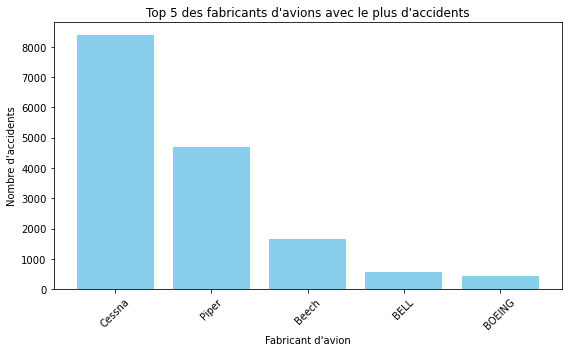

In [10]:
top_makes = aviation_data['Make'].value_counts().head(5)

aviation_data['Make'] = aviation_data['Make'].str.replace(r'CESSNA.*', 'Cessna', regex=True) 
aviation_data['Make'] = aviation_data['Make'].str.replace(r'PIPER.*', 'Piper', regex=True) 
aviation_data['Make'] = aviation_data['Make'].str.replace(r'BEECH.*', 'Beech', regex=True)

# Création du graphique en barres
plt.figure(figsize=(8,5))
plt.bar(top_makes.index, top_makes.values, color='skyblue')
plt.xlabel('Fabricant d\'avion')
plt.ylabel('Nombre d\'accidents')
plt.title('Top 5 des fabricants d\'avions avec le plus d\'accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<AxesSubplot:title={'center':'Accidents par phase de vol'}>

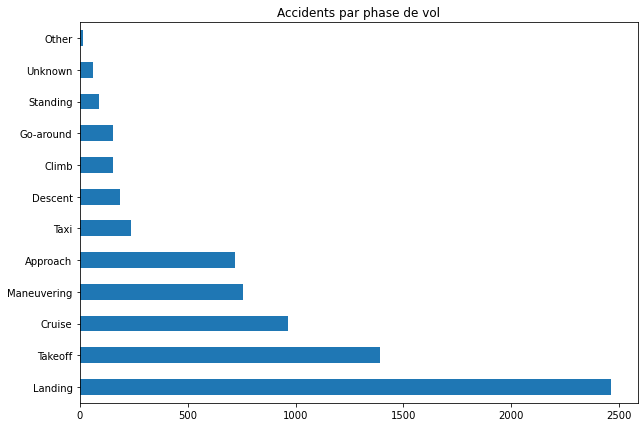

In [11]:
aviation_data['Broad.phase.of.flight'].value_counts().plot(kind='barh', figsize=(10,7), title="Accidents par phase de vol")

### Business Recommendation 1

L’analyse des données a révélé qu’un petit nombre de fabricants concentre la majorité des accidents enregistrés. Il est donc fortement recommandé de sélectionner des aéronefs provenant de fabricants affichant une faible fréquence historique d'accidents. En optant pour ces marques, l'entreprise réduit mécaniquement son exposition aux risques techniques ou structurels liés à la conception. Cette approche est particulièrement importante pour une entreprise débutant dans l’aviation, où la fiabilité des aéronefs est un facteur critique de succès et de confiance client.

### Business Recommendation 2

L’analyse des phases de vol montre que les accidents se concentrent massivement lors du décollage et de l’atterrissage, ce qui sont des moments à forte intensité opérationnelle. Pour limiter les pertes humaines, matérielles et financières, l’entreprise devrait éviter les configurations ou les routes aériennes qui augmentent la fréquence de ces phases critiques (ex. : nombreux décollages/atterrissages dans une même journée, ou aéroports complexes). L’usage de simulateurs pour entraîner les pilotes spécifiquement à ces phases est également recommandé.

### Business Recommendation 3

L’analyse des données montre que les aéronefs à un seul moteur représentent la plus grande part des accidents enregistrés. Cela peut s’expliquer par une moindre redondance mécanique : en cas de panne moteur, il n'existe aucune solution de secours, ce qui augmente significativement le risque d’accident grave. Il est donc vivement recommandé d’éviter l’achat d’appareils monomoteurs pour les opérations commerciales ou de transport de passagers, et de privilégier les avions multimoteurs ou turbopropulseurs plus robustes. Cette décision contribuera à renforcer la sécurité des opérations et à rassurer les clients et investisseurs.

## Conclusion

À l’issue de cette analyse approfondie des données d’accidents aériens, plusieurs enseignements clés ont été mis en évidence. Grâce au nettoyage rigoureux des données, à l’exploration statistique et à la visualisation ciblée, nous avons pu identifier les facteurs de risque majeurs liés aux aéronefs, tels que le type de moteur, le fabricant, ou encore les conditions de vol.

Nos observations montrent notamment que les appareils à moteur unique sont associés à un nombre significativement plus élevé d’accidents, et que certains fabricants apparaissent plus fréquemment dans les rapports d’incident. Ces constats nous ont permis de formuler trois recommandations concrètes visant à orienter l’entreprise vers des choix d’investissement plus sûrs et plus stratégiques dans le secteur aérien.

Cette démarche analytique constitue ainsi un socle de business intelligence sur lequel la nouvelle division aviation peut s’appuyer pour minimiser les risques opérationnels et maximiser les chances de succès dans ce nouveau domaine d’activité.

### Next Steps


Approfondir l’analyse causale des accidents
Identifier plus précisément les causes techniques, humaines ou environnementales en croisant les variables disponibles (conditions météo, phase de vol, type de terrain, etc.). Cela permettra de mieux comprendre les mécanismes de survenance des accidents.

Élargir la portée géographique et temporelle
Compléter l’analyse par des données récentes et des rapports d’autres pays pour obtenir une vision plus globale du risque aérien à l’échelle internationale.

Construire un tableau de bord interactif
Développer un dashboard dynamique pour permettre à la direction de simuler différents scénarios d’achat selon le type d’avion, le constructeur, ou la zone géographique, et de suivre en temps réel les indicateurs de risque.

Rechercher des données complémentaires
Intégrer des informations sur les coûts d’entretien, la durée de vie des aéronefs, et les performances économiques pour enrichir les critères de décision.

Formuler un plan d’achat stratégique
À partir des analyses, proposer un plan d’investissement progressif et raisonné basé sur les aéronefs les moins risqués, en tenant compte du budget de l’entreprise et des besoins opérationnels.